In [122]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
# Load datasets
load_data = pd.read_excel('C:\\Users\death\\Desktop\\btech proj\\DATA SET USED IN THE CONFERENCE PAPER TITLED SHORT-TERM LOAD FORECASTING USING AN LSTM NEURAL NETWORK\\DataSet\\LoadTexasERCOT.xlsx')
weather_data1 = pd.read_excel('C:\\Users\\death\Desktop\\btech proj\\DATA SET USED IN THE CONFERENCE PAPER TITLED SHORT-TERM LOAD FORECASTING USING AN LSTM NEURAL NETWORK\\DataSet\\WeatherStation1.xlsx')
weather_data2 = pd.read_excel('C:\\Users\\death\Desktop\\btech proj\\DATA SET USED IN THE CONFERENCE PAPER TITLED SHORT-TERM LOAD FORECASTING USING AN LSTM NEURAL NETWORK\\DataSet\\WeatherStation2.xlsx')
weather_data3 = pd.read_excel('C:\\Users\\death\Desktop\\btech proj\\DATA SET USED IN THE CONFERENCE PAPER TITLED SHORT-TERM LOAD FORECASTING USING AN LSTM NEURAL NETWORK\\DataSet\\WeatherStation3.xlsx')



<>:15: SyntaxWarning: invalid escape sequence '\d'
<>:16: SyntaxWarning: invalid escape sequence '\D'
<>:17: SyntaxWarning: invalid escape sequence '\D'
<>:18: SyntaxWarning: invalid escape sequence '\D'
<>:15: SyntaxWarning: invalid escape sequence '\d'
<>:16: SyntaxWarning: invalid escape sequence '\D'
<>:17: SyntaxWarning: invalid escape sequence '\D'
<>:18: SyntaxWarning: invalid escape sequence '\D'
C:\Users\death\AppData\Local\Temp\ipykernel_23200\3371781291.py:15: SyntaxWarning: invalid escape sequence '\d'
  load_data = pd.read_excel('C:\\Users\death\\Desktop\\btech proj\\DATA SET USED IN THE CONFERENCE PAPER TITLED SHORT-TERM LOAD FORECASTING USING AN LSTM NEURAL NETWORK\\DataSet\\LoadTexasERCOT.xlsx')
C:\Users\death\AppData\Local\Temp\ipykernel_23200\3371781291.py:16: SyntaxWarning: invalid escape sequence '\D'
  weather_data1 = pd.read_excel('C:\\Users\\death\Desktop\\btech proj\\DATA SET USED IN THE CONFERENCE PAPER TITLED SHORT-TERM LOAD FORECASTING USING AN LSTM NEURAL NE

In [123]:
weather_data1.head(5)

,Year,Month,Day,Hour,Minute,Relative Humidity,Temperature,Pressure
0,2012,1,1,0,30,39.19,6,950
1,2012,1,1,1,30,44.45,5,950
2,2012,1,1,2,30,53.94,4,950
3,2012,1,1,3,30,63.77,2,960
4,2012,1,1,4,30,71.93,2,960


In [124]:
weather_data3.head(5)

,Year,Month,Day,Hour,Minute,Relative Humidity,Temperature,Pressure
0,2012,1,1,0,30,42.80,6,960
1,2012,1,1,1,30,56.15,5,960
2,2012,1,1,2,30,63.72,3,960
3,2012,1,1,3,30,69.80,2,960
4,2012,1,1,4,30,74.92,1,970


In [125]:

weather_data2.head(5)

,Year,Month,Day,Hour,Minute,Relative Humidity,Temperature,Pressure
0,2012,1,1,0,30,63.98,8,950
1,2012,1,1,1,30,49.59,6,950
2,2012,1,1,2,30,46.28,4,950
3,2012,1,1,3,30,52.89,3,960
4,2012,1,1,4,30,62.81,3,960


In [126]:
import pandas as pd

# Assuming weather_data1 is already defined and contains the necessary data

# Print column names to verify
print("Columns in weather_data1:", weather_data1.columns)

# Step 1: Preprocessing
# Convert to Datetime
weather_data1['DateTime'] = pd.to_datetime(weather_data1[['Year', 'Month', 'Day', 'Hour' ]])

# Drop the original columns
weather_data1.drop(columns=['Year', 'Month', 'Day', 'Hour' ], inplace=True)

# Display the first few rows to verify the changes
weather_data1.head()

Columns in weather_data1: Index(['Year', 'Month', 'Day', 'Hour', 'Minute', 'Relative Humidity',
       'Temperature', 'Pressure'],
      dtype='object')


,Minute,Relative Humidity,Temperature,Pressure,DateTime
0,30,39.19,6,950,2012-01-01 00:00:00
1,30,44.45,5,950,2012-01-01 01:00:00
2,30,53.94,4,950,2012-01-01 02:00:00
3,30,63.77,2,960,2012-01-01 03:00:00
4,30,71.93,2,960,2012-01-01 04:00:00


In [127]:
weather_data3['DateTime'] = pd.to_datetime(weather_data2[['Year', 'Month', 'Day', 'Hour']])
weather_data3.drop(columns=['Year', 'Month', 'Day', 'Hour'], inplace=True)
weather_data2['DateTime'] = pd.to_datetime(weather_data2[['Year', 'Month', 'Day', 'Hour']])
weather_data2.drop(columns=['Year', 'Month', 'Day', 'Hour'], inplace=True)
load_data.drop(columns=[col for col in load_data.columns if col not in ['Hour_End', 'ERCOT']], inplace=True)


In [128]:
merged_data = pd.merge(load_data, weather_data1, left_on='Hour_End', right_on='DateTime')
merged_data

,Hour_End,ERCOT,Minute,Relative Humidity,Temperature,Pressure,DateTime
0,2012-01-01 03:00:00,25295.341984,30,63.77,2,960,2012-01-01 03:00:00
1,2012-01-01 06:00:00,25412.350661,30,79.76,0,960,2012-01-01 06:00:00
2,2012-01-01 09:00:00,27697.862737,30,48.63,6,960,2012-01-01 09:00:00
3,2012-01-01 12:00:00,28659.742062,30,25.26,12,960,2012-01-01 12:00:00
4,2012-01-01 15:00:00,27599.056595,30,23.44,12,960,2012-01-01 15:00:00
...,...,...,...,...,...,...,...
11682,2015-12-31 09:00:00,40515.935167,30,95.18,4,950,2015-12-31 09:00:00
11683,2015-12-31 12:00:00,38443.845478,30,86.81,7,950,2015-12-31 12:00:00
11684,2015-12-31 15:00:00,36119.489399,30,83.39,6,950,2015-12-31 15:00:00
11685,2015-12-31 18:00:00,39382.015504,30,72.86,-2,950,2015-12-31 18:00:00


In [129]:
merged_data2 = pd.merge(load_data, weather_data3, left_on='Hour_End', right_on='DateTime')
merged_data2

,Hour_End,ERCOT,Minute,Relative Humidity,Temperature,Pressure,DateTime
0,2012-01-01 03:00:00,25295.341984,30,69.80,2,960,2012-01-01 03:00:00
1,2012-01-01 06:00:00,25412.350661,30,75.63,0,970,2012-01-01 06:00:00
2,2012-01-01 09:00:00,27697.862737,30,45.26,6,970,2012-01-01 09:00:00
3,2012-01-01 12:00:00,28659.742062,30,29.36,12,970,2012-01-01 12:00:00
4,2012-01-01 15:00:00,27599.056595,30,27.66,11,970,2012-01-01 15:00:00
...,...,...,...,...,...,...,...
11682,2015-12-31 09:00:00,40515.935167,30,100.00,1,960,2015-12-31 09:00:00
11683,2015-12-31 12:00:00,38443.845478,30,96.39,4,960,2015-12-31 12:00:00
11684,2015-12-31 15:00:00,36119.489399,30,89.95,4,960,2015-12-31 15:00:00
11685,2015-12-31 18:00:00,39382.015504,30,70.93,-2,960,2015-12-31 18:00:00


In [130]:
merged_data3 = pd.merge(load_data, weather_data2, left_on='Hour_End', right_on='DateTime' )
merged_data3

,Hour_End,ERCOT,Minute,Relative Humidity,Temperature,Pressure,DateTime
0,2012-01-01 03:00:00,25295.341984,30,52.89,3,960,2012-01-01 03:00:00
1,2012-01-01 06:00:00,25412.350661,30,73.31,1,960,2012-01-01 06:00:00
2,2012-01-01 09:00:00,27697.862737,30,46.52,7,960,2012-01-01 09:00:00
3,2012-01-01 12:00:00,28659.742062,30,25.48,13,960,2012-01-01 12:00:00
4,2012-01-01 15:00:00,27599.056595,30,25.14,13,960,2012-01-01 15:00:00
...,...,...,...,...,...,...,...
11682,2015-12-31 09:00:00,40515.935167,30,85.43,6,950,2015-12-31 09:00:00
11683,2015-12-31 12:00:00,38443.845478,30,70.70,8,950,2015-12-31 12:00:00
11684,2015-12-31 15:00:00,36119.489399,30,67.66,8,950,2015-12-31 15:00:00
11685,2015-12-31 18:00:00,39382.015504,30,73.87,0,950,2015-12-31 18:00:00


In [131]:
# stack all 3 mergered dataframes
final_data = pd.concat([merged_data, merged_data2, merged_data3], axis=0)
merged_data  = final_data
#drop the DateTime column
merged_data.drop(columns=['DateTime'], inplace=True)
merged_data

,Hour_End,ERCOT,Minute,Relative Humidity,Temperature,Pressure
0,2012-01-01 03:00:00,25295.341984,30,63.77,2,960
1,2012-01-01 06:00:00,25412.350661,30,79.76,0,960
2,2012-01-01 09:00:00,27697.862737,30,48.63,6,960
3,2012-01-01 12:00:00,28659.742062,30,25.26,12,960
4,2012-01-01 15:00:00,27599.056595,30,23.44,12,960
...,...,...,...,...,...,...
11682,2015-12-31 09:00:00,40515.935167,30,85.43,6,950
11683,2015-12-31 12:00:00,38443.845478,30,70.70,8,950
11684,2015-12-31 15:00:00,36119.489399,30,67.66,8,950
11685,2015-12-31 18:00:00,39382.015504,30,73.87,0,950


## Creating Input features


In [132]:
import holidays
import pandas as pd

# Assuming 'merged_data' DataFrame has 'Hour_End' column as datetime object
# Example: merged_data['Hour_End'] = pd.to_datetime(merged_data['Hour_End'])

# Step 1: Add 'Time of Day Index' (Hour of the day)
merged_data['TimeOfDayIndex'] = merged_data['Hour_End'].dt.hour

# Step 2: Add 'Day of the Week Index' (0 = Monday, 6 = Sunday)
merged_data['DayOfWeekIndex'] = merged_data['Hour_End'].dt.dayofweek

# Step 3: Add 'Holiday Flag' using the 'holidays' library for U.S. and Texas holidays
us_holidays = holidays.US(years=merged_data['Hour_End'].dt.year.unique(), state='TX')
merged_data['HolidayFlag'] = merged_data['Hour_End'].apply(lambda x: 1 if x in us_holidays else 0)

# Step 4: One-Hot Encode 'TimeOfDayIndex', 'DayOfWeekIndex', and 'HolidayFlag'
merged_data = pd.get_dummies(merged_data, columns=['TimeOfDayIndex', 'DayOfWeekIndex'], drop_first=True)
pd.set_option('display.max_columns', None)

# Drop 'DateTime' column if it exists
if 'DateTime' in merged_data.columns:
    merged_data.drop(['DateTime'], axis=1, inplace=True)

# Display the first few rows to verify the one-hot encoded features
print(merged_data.head())

# Count the number of rows where 'HolidayFlag_1' is 1 and 0
holiday_flag_1_count = merged_data['HolidayFlag'].sum()
holiday_flag_0_count = len(merged_data) - holiday_flag_1_count

print(f"Number of rows where HolidayFlag_1 is 1: {holiday_flag_1_count}")
print(f"Number of rows where HolidayFlag_1 is 0: {holiday_flag_0_count}")
merged_data


             Hour_End         ERCOT  Minute  Relative Humidity  Temperature  \
0 2012-01-01 03:00:00  25295.341984      30              63.77            2   
1 2012-01-01 06:00:00  25412.350661      30              79.76            0   
2 2012-01-01 09:00:00  27697.862737      30              48.63            6   
3 2012-01-01 12:00:00  28659.742062      30              25.26           12   
4 2012-01-01 15:00:00  27599.056595      30              23.44           12   

   Pressure  HolidayFlag  TimeOfDayIndex_3  TimeOfDayIndex_6  \
0       960            1              True             False   
1       960            1             False              True   
2       960            1             False             False   
3       960            1             False             False   
4       960            1             False             False   

   TimeOfDayIndex_9  TimeOfDayIndex_12  TimeOfDayIndex_15  TimeOfDayIndex_18  \
0             False              False              False   

,Hour_End,ERCOT,Minute,Relative Humidity,Temperature,Pressure,HolidayFlag,TimeOfDayIndex_3,TimeOfDayIndex_6,TimeOfDayIndex_9,TimeOfDayIndex_12,TimeOfDayIndex_15,TimeOfDayIndex_18,TimeOfDayIndex_21,DayOfWeekIndex_1,DayOfWeekIndex_2,DayOfWeekIndex_3,DayOfWeekIndex_4,DayOfWeekIndex_5,DayOfWeekIndex_6
0,2012-01-01 03:00:00,25295.341984,30,63.77,2,960,1,True,False,False,False,False,False,False,False,False,False,False,False,True
1,2012-01-01 06:00:00,25412.350661,30,79.76,0,960,1,False,True,False,False,False,False,False,False,False,False,False,False,True
2,2012-01-01 09:00:00,27697.862737,30,48.63,6,960,1,False,False,True,False,False,False,False,False,False,False,False,False,True
3,2012-01-01 12:00:00,28659.742062,30,25.26,12,960,1,False,False,False,True,False,False,False,False,False,False,False,False,True
4,2012-01-01 15:00:00,27599.056595,30,23.44,12,960,1,False,False,False,False,True,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11682,2015-12-31 09:00:00,40515.935167,30,85.43,6,950,0,False,False,True,False,False,False,False,False,False,True,False,False,False
11683,2015-12-31 12:00:00,38443.845478,30,70.70,8,950,0,False,False,False,True,False,False,False,False,False,True,False,False,False
11684,2015-12-31 15:00:00,36119.489399,30,67.66,8,950,0,False,False,False,False,True,False,False,False,False,True,False,False,False
11685,2015-12-31 18:00:00,39382.015504,30,73.87,0,950,0,False,False,False,False,False,True,False,False,False,True,False,False,False


In [133]:
# import pandas as pd

# # Assuming scaled_data is already defined and contains the necessary data

# def print_unique_values(data, num_values=7):
#     for column in data.columns:
#         unique_values = data[column].unique()[:num_values]
#         print(f"Column: {column}")
#         print(f"Unique Values: {unique_values}")
#         print()

# # Call the function to print unique values
# print_unique_values(scaled_data)

In [134]:
# X

In [135]:
# X.shape , y.shape

In [136]:
# y

## Train/test split

In [137]:

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Building the l ass tm model

In [138]:
# Exclude the datetime and 'ERCOT' columns before scaling
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler.fit_transform(merged_data.drop(columns=['Hour_End' ,  'ERCOT']))

# Convert scaled features back to DataFrame and re-include the 'Hour_End' and 'ERCOT' columns
scaled_data = pd.DataFrame(scaled_features, columns=merged_data.columns.drop(['Hour_End' , 'ERCOT']))
scaled_data['ERCOT'] = merged_data['ERCOT'].values
# scaled_data['Hour_End'] = merged_data['Hour_End'].values


scaled_data

,Minute,Relative Humidity,Temperature,Pressure,HolidayFlag,TimeOfDayIndex_3,TimeOfDayIndex_6,TimeOfDayIndex_9,TimeOfDayIndex_12,TimeOfDayIndex_15,TimeOfDayIndex_18,TimeOfDayIndex_21,DayOfWeekIndex_1,DayOfWeekIndex_2,DayOfWeekIndex_3,DayOfWeekIndex_4,DayOfWeekIndex_5,DayOfWeekIndex_6,ERCOT
0,0.0,0.608197,0.215686,0.6,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,25295.341984
1,0.0,0.781118,0.176471,0.6,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,25412.350661
2,0.0,0.444468,0.294118,0.6,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,27697.862737
3,0.0,0.191738,0.411765,0.6,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,28659.742062
4,0.0,0.172056,0.411765,0.6,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,27599.056595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35056,0.0,0.842435,0.294118,0.4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,40515.935167
35057,0.0,0.683140,0.333333,0.4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,38443.845478
35058,0.0,0.650265,0.333333,0.4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,36119.489399
35059,0.0,0.717422,0.176471,0.4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,39382.015504


In [139]:
#print dtype of all columns
print(scaled_data.dtypes)
scaled_data.head(5)

# Ensure all data is of type float64
scaled_data = scaled_data.astype(np.float64)

def create_sequences(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data.iloc[i:i + time_steps].drop(columns=['ERCOT']).values)
        y.append(data.iloc[i + time_steps]['ERCOT'])
    return np.array(X), np.array(y)

# Assuming scaled_data is already defined and contains the necessary data
time_steps = 18  # Example time steps
X, y = create_sequences(scaled_data, time_steps)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Ensure all data is of type float32
X_train = X_train.astype(np.float64)
X_test = X_test.astype(np.float64)
y_train = y_train.astype(np.float64)
y_test = y_test.astype(np.float64)

# import dropout
from tensorflow.keras.layers import Dropout
# Define the model
model = Sequential()
model.add(LSTM(55, return_sequences=True, input_shape=(time_steps, X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(1))  # Output layer for load prediction

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

# Make predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Inverse transform the predictions back to original scale
# Create a new scaler for the target variable 'ERCOT'
# target_scaler = MinMaxScaler(feature_range=(0, 1))
# target_scaler.min_, target_scaler.scale_ = scaler.min_[-1], scaler.scale_[-1]

# Inverse transform the predictions
# Fit a separate scaler for the target variable 'ERCOT'
target_scaler = MinMaxScaler(feature_range=(0, 1))
target_scaler.fit(merged_data[['ERCOT']])

# Inverse transform the predictions
scaled_train_predictions = target_scaler.inverse_transform(train_predictions)
scaled_test_predictions = target_scaler.inverse_transform(test_predictions)
scaled_y_train = target_scaler.inverse_transform(y_train.reshape(-1, 1))
scaled_y_test = target_scaler.inverse_transform(y_test.reshape(-1, 1))

# Print scaled predictions
print("Scaled Train Predictions:", scaled_train_predictions)
print("Scaled Test Predictions:", scaled_test_predictions)

Minute               float64
Relative Humidity    float64
Temperature          float64
Pressure             float64
HolidayFlag          float64
TimeOfDayIndex_3     float64
TimeOfDayIndex_6     float64
TimeOfDayIndex_9     float64
TimeOfDayIndex_12    float64
TimeOfDayIndex_15    float64
TimeOfDayIndex_18    float64
TimeOfDayIndex_21    float64
DayOfWeekIndex_1     float64
DayOfWeekIndex_2     float64
DayOfWeekIndex_3     float64
DayOfWeekIndex_4     float64
DayOfWeekIndex_5     float64
DayOfWeekIndex_6     float64
ERCOT                float64
dtype: object
Epoch 1/5


C:\Users\death\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


877/877 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - loss: 1536311168.0000 - val_loss: 1521392512.0000
Epoch 2/5
877/877 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - loss: 1502983168.0000 - val_loss: 1488648832.0000
Epoch 3/5
877/877 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - loss: 1469642112.0000 - val_loss: 1456390656.0000
Epoch 4/5
877/877 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - loss: 1443067520.0000 - val_loss: 1424602752.0000
Epoch 5/5
877/877 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - loss: 1403269120.0000 - val_loss: 1393182336.0000
877/877 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Scaled Train Predictions: [[1.0161698e+08]
 [1.0161698e+08]
 [1.0161698e+08]
 ...
 [1.0161698e+08]
 [1.0161698e+08]
 [1.0161698e+08]]
Scaled Test Predictions: [[1.0161698e+08]
 [1.0161698e+08]
 [1.0161698e+08]
 ...
 [1.0161698e+08]
 [1.0161698e+08]
 [1.0161698e+08]]


Training MAE: 1686025271.8240106, RMSE: 1738017882.7906342, R²: -15.967881571055024
Testing MAE: 1691713843.7442176, RMSE: 1743455596.2376504, R²: -16.101432243846915


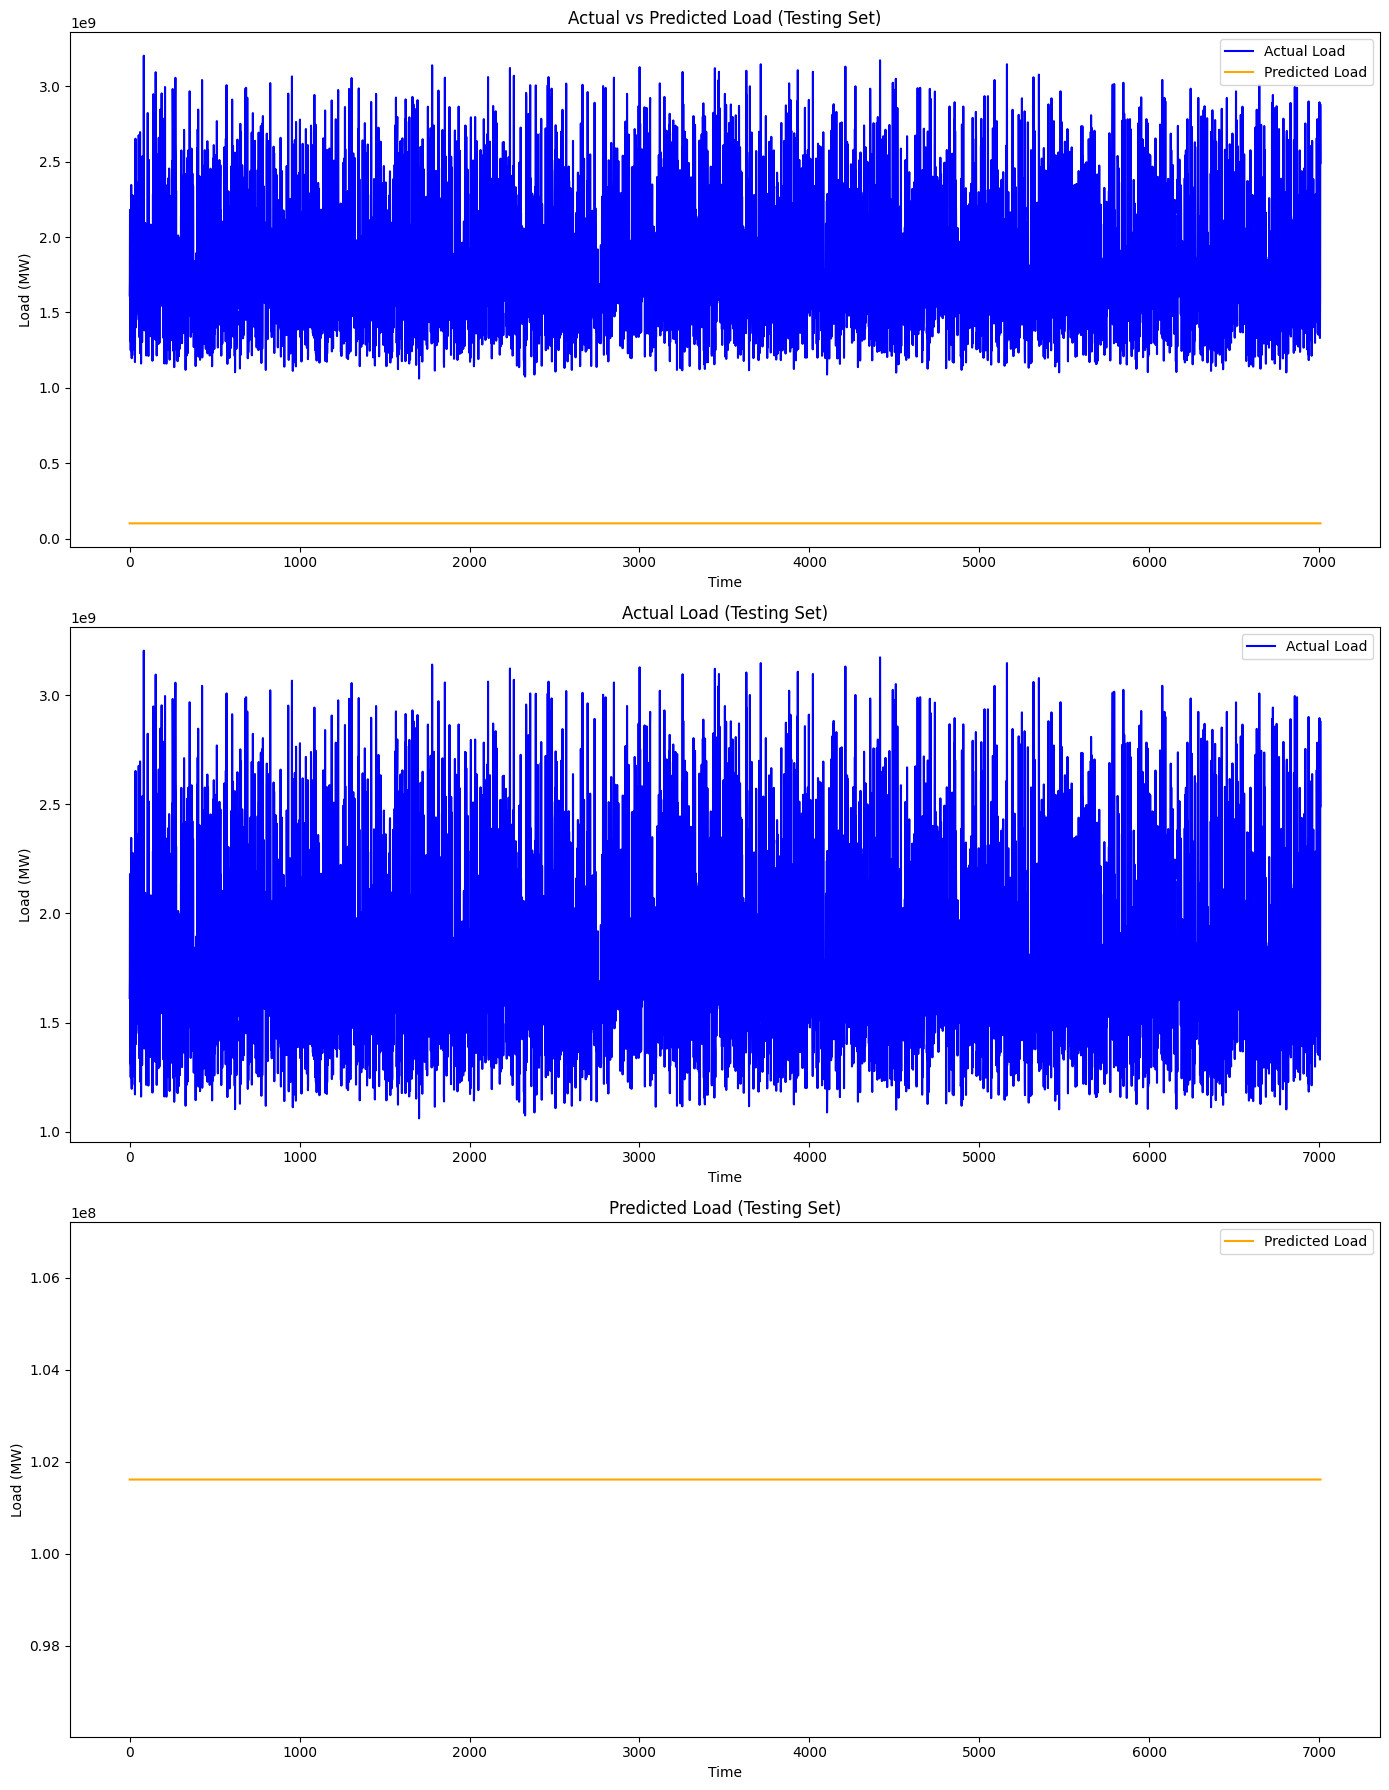

In [140]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Calculate MAE and RMSE
train_mae = mean_absolute_error(scaled_y_train, scaled_train_predictions)
test_mae = mean_absolute_error(scaled_y_test, scaled_test_predictions)
train_rmse = np.sqrt(mean_squared_error(scaled_y_train, scaled_train_predictions))
test_rmse = np.sqrt(mean_squared_error(scaled_y_test, scaled_test_predictions))

# Calculate R² score
train_r2 = r2_score(scaled_y_train, scaled_train_predictions)
test_r2 = r2_score(scaled_y_test, scaled_test_predictions)

# Print the results
print(f'Training MAE: {train_mae}, RMSE: {train_rmse}, R²: {train_r2}')
print(f'Testing MAE: {test_mae}, RMSE: {test_rmse}, R²: {test_r2}')

# Step 8: Plot the results in separate subplots
plt.figure(figsize=(14, 18))

# Plot overlapping actual and predicted load
plt.subplot(3, 1, 1)
plt.plot(scaled_y_test, label='Actual Load', color='blue')
plt.plot(scaled_test_predictions, label='Predicted Load', color='orange')
plt.title('Actual vs Predicted Load (Testing Set)')
plt.xlabel('Time')
plt.ylabel('Load (MW)')
plt.legend()

# Plot actual load
plt.subplot(3, 1, 2)
plt.plot(scaled_y_test, label='Actual Load', color='blue')
plt.title('Actual Load (Testing Set)')
plt.xlabel('Time')
plt.ylabel('Load (MW)')
plt.legend()

# Plot predicted load
plt.subplot(3, 1, 3)
plt.plot(scaled_test_predictions, label='Predicted Load', color='orange')
plt.title('Predicted Load (Testing Set)')
plt.xlabel('Time')
plt.ylabel('Load (MW)')
plt.legend()

plt.tight_layout()
plt.show()